## 3. Occupancy Detection

첨부된 'Occupancy Detection' 데이터를 활용하여 사람의 재실 여부를 예측하는 모델을 만드세요.

- `Imputation`
    1. 결측치가 있는 변수를 확인한 뒤
    2. 결측치 변수를 첫 행부터 80%까지의 값의 중위수로 대체하세요.
  - **-> 빅기사 기출 입니다.**
- `Feature Engineering`
    1. 'date'변수를 제외한 모든 피처에 min-max scaling을 시행하세요.
    - **-> 장연훈 선생님 문제 참고했습니다.**
- `Sampling`
    1. 타겟(Occupancy)에 불균형이 있는지 확인한 뒤
    2. 언더 샘플링 기법 중 단순 임의 추출법(Simple Random sampling)을 사용하여 불균형을 완화하세요.
   - **-> ADP실기 1과목 기출 변형입니다. 원래는 샘플링 방법 3가지 쓰고 논리도 서술한 뒤 합당한 샘플링 방법 사용**
- `Modeling`
    1. 나이브 베이즈 모델을 만드세요.
      - **-> ADP실기 2과목 기출 변형입니다. 원래는 베이지안 검정시행**
    - Test set: 30%
    - Target: `Occupancy`
    - Feature: 'date'를 제외한 모든 변수 활용
    - seed 번호: 2022
    - 변수설명 (ref. [https://elapser.github.io/projects/2019/02/21/Projects-Naver.html](https://elapser.github.io/projects/2019/02/21/Projects-Naver.html))

In [29]:
library(dplyr) ; library(magrittr)

### 3-1. Imputation

- `step1)` 데이터 불러오기 및 간단한 구조 확인

In [38]:
setwd("C:/Users/alsdu/Downloads/20220501_데이터분석 스터디")
df<-read.csv("Occupancy Detection.csv")

In [16]:
str(df)

'data.frame':	17910 obs. of  7 variables:
 $ date         : Factor w/ 14573 levels "2015-02-02 14:19",..: 1 2 3 3 4 5 6 7 8 8 ...
 $ Temperature  : num  23.7 23.7 23.8 23.8 23.8 ...
 $ Humidity     : num  26.3 26.1 26.2 26.3 26.3 ...
 $ Light        : num  578 494 489 569 509 ...
 $ CO2          : num  760 775 779 790 797 ...
 $ HumidityRatio: num  0.00477 0.00474 0.00477 0.00478 0.00478 ...
 $ Occupancy    : int  1 1 1 1 1 1 1 1 1 1 ...


In [17]:
summary(df)  #CO2변수에서 결측치 확인

               date        Temperature       Humidity         Light        
 2015-02-02 14:23:    2   Min.   :19.00   Min.   :16.75   Min.   : -99.00  
 2015-02-02 14:31:    2   1st Qu.:20.10   1st Qu.:24.39   1st Qu.:   0.00  
 2015-02-02 14:38:    2   Median :20.60   Median :27.20   Median :   0.00  
 2015-02-02 14:51:    2   Mean   :20.75   Mean   :27.59   Mean   :  78.16  
 2015-02-02 14:55:    2   3rd Qu.:21.20   3rd Qu.:31.29   3rd Qu.:  22.00  
 2015-02-02 15:08:    2   Max.   :24.41   Max.   :39.50   Max.   :1581.00  
 (Other)         :17898                                                    
      CO2         HumidityRatio        Occupancy     
 Min.   : 412.8   Min.   :0.002674   Min.   :0.0000  
 1st Qu.: 453.0   1st Qu.:0.003702   1st Qu.:0.0000  
 Median : 532.7   Median :0.004222   Median :0.0000  
 Mean   : 647.7   Mean   :0.004175   Mean   :0.1173  
 3rd Qu.: 722.0   3rd Qu.:0.004790   3rd Qu.:0.0000  
 Max.   :2076.5   Max.   :0.006461   Max.   :1.0000  
 NA's   :21   

- `step2)` 데이터프레임 80% 추출

In [39]:
n<-nrow(df)*0.8
df2<-df[c(1:n),] ;str(df2)

'data.frame':	14328 obs. of  7 variables:
 $ date         : Factor w/ 14573 levels "2015-02-02 14:19",..: 1 2 3 3 4 5 6 7 8 8 ...
 $ Temperature  : num  23.7 23.7 23.8 23.8 23.8 ...
 $ Humidity     : num  26.3 26.1 26.2 26.3 26.3 ...
 $ Light        : num  578 494 489 569 509 ...
 $ CO2          : num  760 775 779 790 797 ...
 $ HumidityRatio: num  0.00477 0.00474 0.00477 0.00478 0.00478 ...
 $ Occupancy    : int  1 1 1 1 1 1 1 1 1 1 ...


- `step3)` 추출한 데이터에서 결측 제외 후 중앙값 산출

In [22]:
M<-median(df2[,5], na.rm=T) ; M

[1] 503.5

- `step 4)` 원래 데이터셋에서 결측값을 중앙값으로 imputation

In [40]:
df[,5]<-ifelse(is.na(df[,5]), M,  df[,5])

In [35]:
summary(df) # 확인

               date        Temperature       Humidity         Light        
 2015-02-02 14:23:    2   Min.   :19.00   Min.   :16.75   Min.   : -99.00  
 2015-02-02 14:31:    2   1st Qu.:20.10   1st Qu.:24.39   1st Qu.:   0.00  
 2015-02-02 14:38:    2   Median :20.60   Median :27.20   Median :   0.00  
 2015-02-02 14:51:    2   Mean   :20.75   Mean   :27.59   Mean   :  78.16  
 2015-02-02 14:55:    2   3rd Qu.:21.20   3rd Qu.:31.29   3rd Qu.:  22.00  
 2015-02-02 15:08:    2   Max.   :24.41   Max.   :39.50   Max.   :1581.00  
 (Other)         :17898                                                    
      CO2         HumidityRatio        Occupancy     
 Min.   : 412.8   Min.   :0.002674   Min.   :0.0000  
 1st Qu.: 453.0   1st Qu.:0.003702   1st Qu.:0.0000  
 Median : 532.5   Median :0.004222   Median :0.0000  
 Mean   : 647.5   Mean   :0.004175   Mean   :0.1173  
 3rd Qu.: 722.0   3rd Qu.:0.004790   3rd Qu.:0.0000  
 Max.   :2076.5   Max.   :0.006461   Max.   :1.0000  
              

### 3-2. Feature Engineering
- min-max scaling

In [36]:
min_max_norm <- function(x) { (x-min(x))/ (max(x)- min(x))}
#df_norm <- as.data.frame(lapply(df[2:6], min_max_norm))

In [41]:
df %<>% mutate_at (       vars(Temperature,Humidity,Light,CO2,HumidityRatio ) , 
                   .funs=   min_max_norm    )

### 3-3. Sampling

- `Step1)` 타겟 불균형 확인


    0     1 
15810  2100 

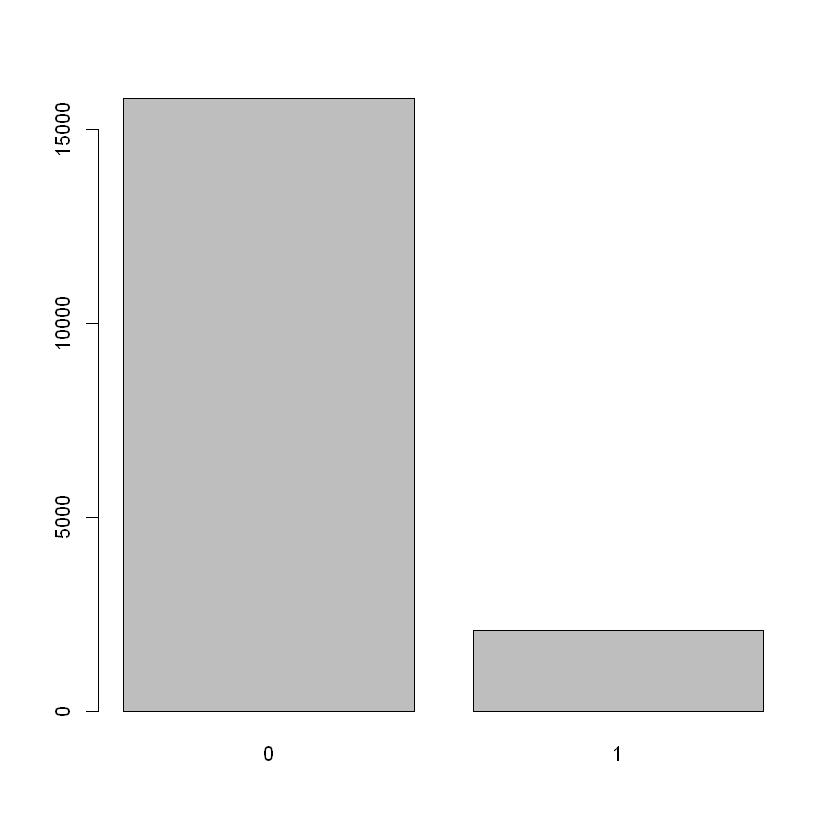

In [58]:
table(df[,7]) ;  barplot(table(df[,7]))

In [67]:
prop.table( table(df[7]) )*100   


       0        1 
88.27471 11.72529 

- 1) 액티브그룹이 전체에 대해서 약12%
- 2) 위 문제의 경우는 확인해보니 괜찮은 밸런스였고 오히려 샘플이 부족하다고 할 수 있었습니다ㅠㅠ
- 3) 원래 의도는 액티브 그룹을 모두 추출하고, 인액티브 그룹에서 임의추출 후 가중치 두기 -> 층화임의...??
- ref.Data Mining Cookbook Robert Elliot (2001)

- ~~`Step2)` simple random samling~~

### 3-4. Modeling
- 결과에 대한 전체 확률 추정, 여러 속성 정보 고려 
- 독립을 가정(다른 사건의 정보가 한 사건의 결과에 대한 정보를 제공하지 못함)하기 때문에 본 데이터에서는 사실상 적절한 모델은 아니었음 (그러나 잘못된 가정에서도 잘 작동하는 이유, ref. On the optimality of the simple Bayesian classifier under zero-one loss)
- 텍스트 분류에 많이 씀
- 베이지안 기본 개념
: 사건(결과)에 대한 가능도는(likelihood)는 시행(사건이 발생할 기회)에서 즉시 사용할 수 있는 증거를 기반으로 해서 추정해야 한다. (ref. R을 활용한 머신러닝, 브레트란츠)
-나이브 베이즈 분류기를 사용하기 위해서 베이즈확률이나 그 외의 베이즈 기법을 사용할 필요는 없다.(ref. https://kugistory.tistory.com/72)
- 본 데이터에서 사건:재실, 시행:date 라고 할 수 있음
- 사전확률: P(Occupancy==1)    
- 가능도: P(피처|Occupancy==1)
- 주변가능도: P(피처)
- 사후확률: 앞으로의 데이터에서의 P( Occupancy==1 |피처) 

-`step1)` split

In [71]:
idx<-sample(1:nrow(df), nrow(df)*0.7, replace=FALSE )
train<-df[idx,];test<-df[-idx,]

In [74]:
str(train)

'data.frame':	12537 obs. of  7 variables:
 $ date         : Factor w/ 14573 levels "2015-02-02 14:19",..: 3105 8319 13957 7533 8625 950 13145 726 12712 10981 ...
 $ Temperature  : num  0.423 0.608 0.222 0.239 0.37 ...
 $ Humidity     : num  0.2 0.439 0.609 0.718 0.468 ...
 $ Light        : num  0.331 0.3202 0.0589 0.0589 0.0589 ...
 $ CO2          : num  0.2538 0.0855 0.2027 0.0233 0.0879 ...
 $ HumidityRatio: num  0.172 0.469 0.477 0.581 0.406 ...
 $ Occupancy    : int  1 1 0 0 0 0 0 0 0 0 ...


- `step2)` Modeling

In [72]:
library(e1071)

Warning message:
"package 'e1071' was built under R version 3.6.3"

In [83]:
nb<-naiveBayes(train[,-c(1,7)], train$Occupancy)

In [84]:
pred<-predict(nb, test[,-c(1,7)])

-`Step3)` 평가

In [86]:
library(caret)

Warning message:
"package 'caret' was built under R version 3.6.3"Loading required package: lattice
Loading required package: ggplot2


In [88]:
confusionMatrix(pred, as.factor(test[,7]), positive="1")  #  Accuracy : 0.9643

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 4529    5
         1  187  652
                                         
               Accuracy : 0.9643         
                 95% CI : (0.959, 0.9691)
    No Information Rate : 0.8777         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.8513         
                                         
 Mcnemar's Test P-Value : < 2.2e-16      
                                         
            Sensitivity : 0.9924         
            Specificity : 0.9603         
         Pos Pred Value : 0.7771         
         Neg Pred Value : 0.9989         
             Prevalence : 0.1223         
         Detection Rate : 0.1213         
   Detection Prevalence : 0.1562         
      Balanced Accuracy : 0.9764         
                                         
       'Positive' Class : 1              
                                         

In [89]:
library(pROC)

Warning message:
"package 'pROC' was built under R version 3.6.3"Type 'citation("pROC")' for a citation.

Attaching package: 'pROC'

The following objects are masked from 'package:stats':

    cov, smooth, var



Setting levels: control = 0, case = 1
Setting direction: controls < cases


Area under the curve: 0.888

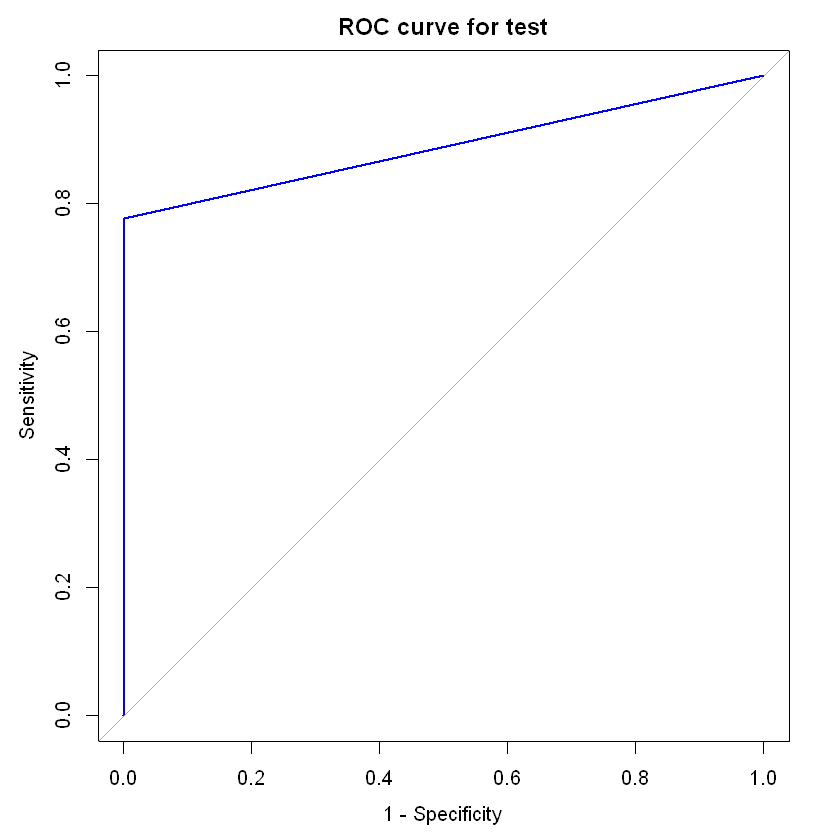

In [90]:
roc_test<-roc(  pred, test[,7]    ); auc(roc_test)    # 0.89
plot.roc(roc_test, main="ROC curve for test", col="blue", legacy.axes=T)